# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


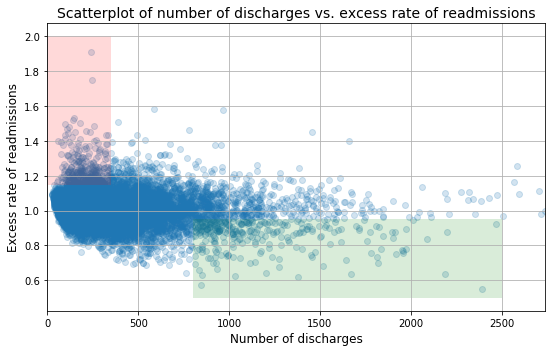

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [124]:
# making a copy of the data and dropping columns I won't be using.  Also renaming
# some columns just to make them easier to type and work with
cdf = clean_hospital_read_df.copy()
cdf.drop('Hospital Name', axis=1, inplace=True)
cdf.drop('State', axis=1, inplace=True)
cdf.drop('Measure Name', axis=1, inplace=True)
cdf.drop('Footnote', axis=1, inplace=True)

cdf.dropna(subset=['Number of Readmissions'], inplace=True)
cdf.rename(columns={'Number of Discharges':'discharges', \
                    'Excess Readmission Ratio':'excess_ratio', \
                   'Predicted Readmission Rate':'predicted_rate', \
                    'Expected Readmission Rate':'expected_rate',\
                   'Number of Readmissions':'readmissions'}, inplace=True)



# a simple ratio of readmissions over discharges.
cdf['readmit_rate'] = cdf.readmissions/cdf.discharges


# wanted to look at raw values first before getting into questions of 'expected', 
# 'predicted', 'excess', etc.  
def fig1():
    print "Elite hospitals mean readmission rate     = ", \
     round(cdf[(cdf.readmit_rate <= .1) & (cdf.discharges < 3000)].readmit_rate.mean(), 3)
    print "Non-elite hospitals mean readmission rate = ", \
    round(cdf[(cdf.readmit_rate > .1) & (cdf.discharges < 3000)].readmit_rate.mean(), 3)
    
    fig, axs = plt.subplots(1, 2, figsize=(18,4))
    axs[0].scatter(cdf.discharges, cdf.readmissions ,alpha=0.2);
    axs[0].set_xlabel('Number of discharges')
    axs[0].set_ylabel('Readmissions')
    cdf[['readmit_rate', 'discharges', 'readmissions']]\
              .sort_values('discharges').readmit_rate\
                 .plot(kind='hist', bins=200, ax=axs[1], \
                   title='readmissions/discharges (readmit_rate)')
    
def fig1a():
    elitemean = round(cdf[(cdf.readmit_rate < .1) & (cdf.discharges < 3000)]\
                                                      .discharges.mean(), 2) 
    print 'average size of elite hospitals (red dotted)        = ', elitemean,\
                                                                   'discharges'
    
    non_elitemean = round(cdf[(cdf.readmit_rate > .1) & (cdf.discharges < 3000)]\
                                                          .discharges.mean(), 2)
    print 'average size of non-elite hospitals (orange dotted) = ', non_elitemean,\
                                                                       'discharges'
       
    fix, axs = plt.subplots(1, 2, figsize=(20, 6))
    dischargeline = cdf[cdf.discharges < 3000]
    axs[0].scatter(dischargeline.discharges, dischargeline.readmit_rate)
    axs[0].set_xlabel('Number of discharges')
    axs[0].set_ylabel('Readmission rate')
    axs[0].set_title("All hospitals")
    axs[0].axhline(.05, color='r', linewidth=62, alpha=.3)
    axs[0].axhline(.2, color='orange', linewidth=124, alpha=.3)
    axs[0].vlines(x=elitemean, ymin=0, ymax=.1, color='red',\
                                       linestyle='dotted', linewidth=4)
    axs[0].vlines(x=non_elitemean, color='orange', linestyle='dotted', \
                                       linewidth=4, ymin=.1, ymax=.3)
    axs[0].axvline(300, color='white', linewidth=1)
    
    cdf[(cdf.readmit_rate < .1) & (cdf.discharges < 3000)]\
        .discharges.plot(ax=axs[1], kind='hist',bins=100, color='brown', alpha=.9)
        
    cdf[(cdf.readmit_rate > .1) & (cdf.discharges < 3000)]\
        .discharges.plot(ax=axs[1], kind='hist', bins=100, alpha=.6, \
                                       title='discharges on x axis')
    axs[1].vlines(x=elitemean, color='red', linestyle='dotted', \
                                       linewidth=4, ymin=0, ymax=40)
    axs[1].vlines(x=non_elitemean, color='orange', linestyle='dotted', \
                                       linewidth=4, ymin=80, ymax=380)
    axs[1].axvline(300, color='white', linewidth=1)


# the histogram in fig1 shows two clear peaks.  The readmit rate value of .1 is a convenient
# place to separate them.  Discharges > 3000 removes 3 outliers.
def fig2():
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    cdf[(cdf.readmit_rate < .1) & (cdf.discharges < 3000)]\
           .discharges.plot(ax=axs[0], kind='hist',bins=100, color='orange', alpha=.9)
    cdf[(cdf.readmit_rate > .1) & (cdf.discharges < 3000)]\
          .discharges.plot(ax=axs[0], kind='hist', bins=100, alpha=.6, \
    title='discharges on x axis( orange/olive:readmit_rate < .1, blue:readmit_rate > .1 )')
    
    cdf[cdf.discharges < 111].readmit_rate.plot(ax=axs[1], kind='hist', bins=20, \
    title='readmissions/discharges for hospitals with fewer than 111 discharges')
    axs[0].set_yscale('log')
    print '# discharges of hospitals with readmit rate < .1 = ', \
           round(cdf[(cdf.readmit_rate < .1) & (cdf.discharges < 3000)].discharges.mean(), 2)
    print '# discharges of hospitals with readmit rate > .1 = ', \
           round(cdf[(cdf.readmit_rate > .1) & (cdf.discharges < 3000)].discharges.mean(), 2)
    lsb = len(cdf[(cdf.readmit_rate < .1) & (cdf.discharges < 400)])
    lss = len(cdf[(cdf.readmit_rate < .1) & (cdf.discharges > 400)])
    print 'low readmit hospitals with < 400 discharges =', lsb
    print 'low readmit hospitals with > 400 discharges =', lss
    lsb = len(cdf[(cdf.readmit_rate > .1) & (cdf.discharges < 400)])
    lss = len(cdf[(cdf.readmit_rate > .1) & (cdf.discharges > 400)])
    print 'high readmit hospitals with < 400 discharges =', lsb
    print 'high readmit hospitals with > 400 discharges =', lss

def fig_excess_1():
    exline = cdf[cdf.discharges < 300]
    fig, axs = plt.subplots(1,2,figsize=(18,6))
    axs[0].scatter(exline.excess_ratio, exline.readmit_rate, s=2)
    axs[0].set_xlabel('Excess ratio')
    axs[0].set_ylabel('Readmission rate')
    axs[1].scatter(exline.excess_ratio, exline.discharges, s=2)
    axs[1].set_xlabel('Excess ratio')
    axs[1].set_ylabel('Discharges')
    
    cdf['excess_over_discharges'] = (cdf.excess_ratio / cdf.readmit_rate)
    boom = cdf[cdf.discharges < 300]
    fig, ax = plt.subplots(1,1,figsize=(18,8))
    ax.scatter(x=boom.excess_over_discharges, y=boom.discharges)
    ax.axhline(100)
    ax.set_xlabel('Excess/readmit_rate')
    ax.set_ylabel('Discharges')

# looking for that downward trend that they report. 
def fig3():
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    cdf[['discharges', 'readmit_rate']][cdf.discharges < 3000]\
          .sort_values('discharges', ascending=False)\
          .plot(ax=axs[0], kind='scatter', x='discharges', y='readmit_rate')
            
    cdf[['discharges', 'readmit_rate']][(cdf.discharges < 500)]\
          .sort_values('discharges', ascending=False)\
          .plot(ax=axs[1], kind='scatter', x='discharges', y='readmit_rate')
        
def fig4():
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))
    cdf['scaled_readmit_rate'] = cdf['readmit_rate'] * 100
    cdf['200_readmit_ma'] = cdf.sort_values('expected_rate')\
                     .scaled_readmit_rate.rolling(200).mean()
    cdf['4_readmint_ma'] = cdf.sort_values('expected_rate')\
                      .scaled_readmit_rate.rolling(4).mean()
    cdf.sort_values('expected_rate').reset_index()\
            [['expected_rate', 'scaled_readmit_rate', '200_readmit_ma']]\
                                                   .plot(alpha=.6, ax=axs[0],\
                                                   title='demystifying "expected" rate')
    cdf.sort_values('expected_rate').reset_index()\
        [:100][['predicted_rate', 'scaled_readmit_rate', '4_readmint_ma']]\
                                                    .plot(alpha=.7, ax=axs[1],\
                                                    title='demystifying "predicted" rate')

def fig5():
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))
    cdf[(cdf.excess_ratio < 16) & (cdf.discharges < 3000)].\
           plot(x='excess_ratio', y='discharges', kind='scatter', ax=axs[0], s=1, \
                title='"excess" ratio for all hospitals')
        
    cdf[(cdf.excess_ratio < 16) & (cdf.discharges < 111)].\
           plot(x='excess_ratio', y='discharges', kind='scatter', ax=axs[1], s=1,\
               title='"excess" ratio for the smallest hospitals (below 111 discharges)')


<div  style="background-color:PapayaWhip"> <b> Hospital Readmission - reviewing the data </b></div>

Hospitals were evaluated in terms of their readmission rates in a study that concluded with a recommendation to force consolidation of smaller hospitals into larger ones.  

Some indicators used in arriving at this conclusion, such as the "expected" readmission rate and the "predicted" readmission rate, are not fully explained.  Thus the final indicator that is the basis of the recommendation, the "excess rate" of readmissions, cannot be fully understood.  However, the "expected" and "predicted" rates are based on a notion of a peer group of hospitals that depends on "an average hospital with similar patients".

Before considering these benchmarks, let's look at the data we're actaully given.  The scatter plot on the left shows the number of readmissions vs the number of discharges and the histogram on the right shows the ratio between those two values, which I'll call the readmit_rate.

There are clearly two classes of hospitals.  Most hospitals belong to a group that gets roughly between 10% and 30% of their discharged patients back, while a smaller number of hospitals have set themselves apart, getting fewer than 10% of their patients back with a mean for that group just under 6%. 

Elite hospitals mean readmission rate     =  0.057
Non-elite hospitals mean readmission rate =  0.2


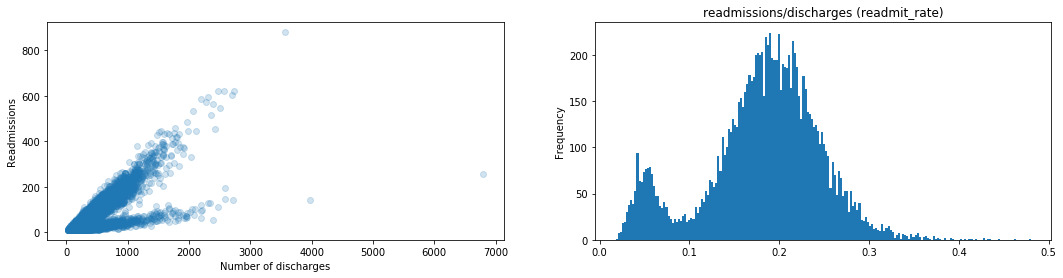

In [22]:
fig1()

A city of two tails

The question put on the table by the study conclusions is what role size plays in the difference in readmission rates.  The study conclusions contemplate forcing consolidation of hospitals below 300 discharges (solid white vertical line) into those above that number.  This is, indeed, the size at which the two classes of outcomes begin to emerge.   

Below the level of 300 discharges in the period, there is also a group of very poorly performing hospitals with greater than a 30% readmission rate.  Although the report recommendation specifies only that hospitals at this size level that do not "demonstrate upgraded resource allocation for quality care" should be forced to consolidate with larger hospitals, it seems likely that this is the group of hospitals being targeted. 

Among the larger hospitals, there are almost no hospitals right at the 10% readmission rate.  Something happens at larger hospitals that forces them down one of two paths towards either peak or middle of the road performance.  Whatever those conditions or opportunities are, they are not faced by smaller hospitals in the same way.

average size of elite hospitals (red dotted)        =  536.11 discharges
average size of non-elite hospitals (orange dotted) =  340.96 discharges


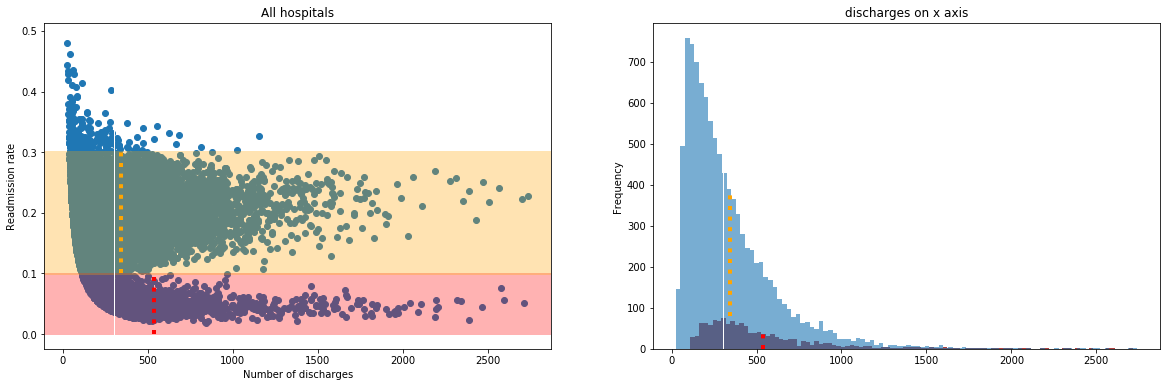

In [62]:
fig1a()

Whatever may seem likely, we don't actually know which hospitals below the 300 discharge level will be targeted for consolidation, or how many of them will.  

Although the opaque "excess rate" was used to arrive at the report conclusion, the recommendation is still keyed on size alone, not on excess rate, so we can't necessarily use the excess rate to focus in on the doomed hospitals.  

<hr>

Still, let's have a look at excess rate. 

<blockquote>Excess readmission ratio = (risk-adjusted predicted readmissions) / (risk-adjusted expected readmissions) 
</blockquote>

One thing to note about the "expected" rate and the "predicted" rate is that they can be approximated by the 200 point and 4 point moving averages, respectively, of readmission rate (plots below).  Although that doesn't explain what they are, it gives a context for understanding them.  Again, these numbers are rooted in some notion of a peer group.  What we can see here is that those peer groups align fairly well with the readmission rates.

Since the "expected" and "predicted" rates are both understandable as different degrees of smoothing of the readmission rate, and since the excess rate, in turn, is only the ratio between them, we can view the excess ratio as being the degree of deviation from an ideal, where that ideal is localized to the peer group to which a particular hospital belongs.


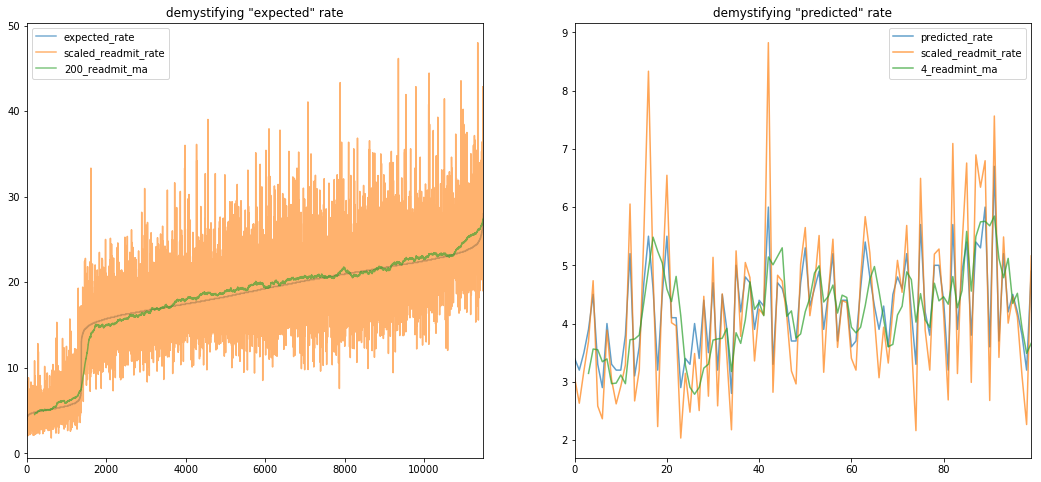

In [44]:
fig4()

Plotting the "excess ratio" against the readmission rate, once again the elite hospitals show up clearly.  But we're not looking for the elite hospitals.  What we're looking for is to see if the excess ratio does anything to distinguish the worst performing hospitals from the merely small ones.

Plotting the "excess ratio" against hopital size, as the report itself does, get us no closer.

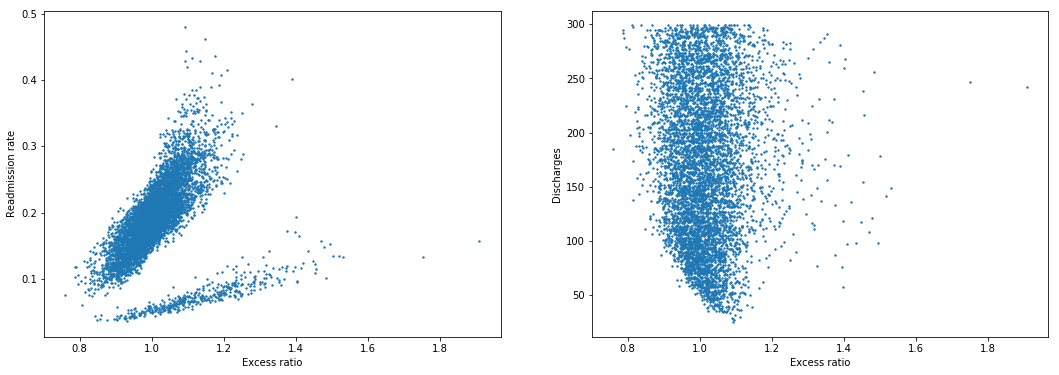

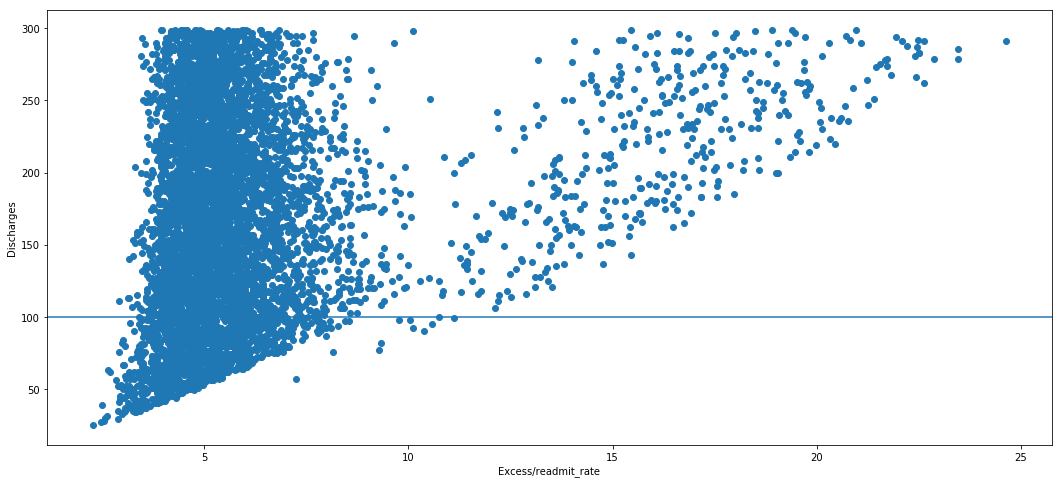

In [125]:
fig_excess_1()

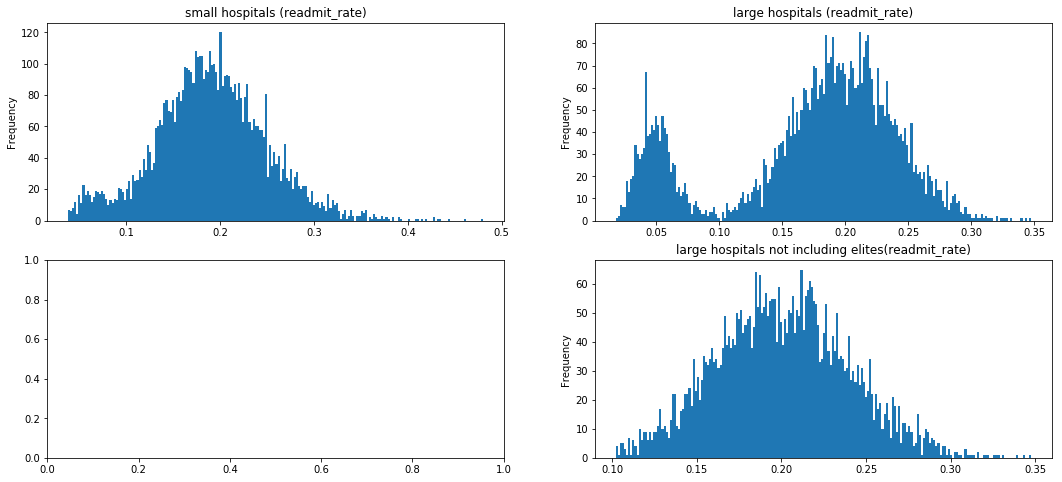

In [8]:
small_cohort = cdf[['readmit_rate', 'discharges']][(cdf.discharges < 300)]
large_cohort = cdf[['readmit_rate', 'discharges']][(cdf.discharges > 300)]
sub_large_cohort = cdf[['readmit_rate', 'discharges']][(cdf.discharges > 300) & (cdf.readmit_rate > .1)]
#print len(small_cohort)
#print len(sub_large_cohort)

fig, axs = plt.subplots(2, 2, figsize=(18,8))
small_cohort[['readmit_rate', 'discharges']].sort_values('discharges').readmit_rate\
        .plot(kind='hist', bins=200, ax=axs[0][0], title='small hospitals (readmit_rate)')
large_cohort[['readmit_rate', 'discharges']].sort_values('discharges').readmit_rate\
        .plot(kind='hist', bins=200, ax=axs[0][1], title='large hospitals (readmit_rate)')
sub_large_cohort[['readmit_rate', 'discharges']].sort_values('discharges').readmit_rate\
        .plot(kind='hist', bins=200, ax=axs[1][1], title='large hospitals not including elites(readmit_rate)');

readmit_rate      0.011325
discharges      398.994667
dtype: float64


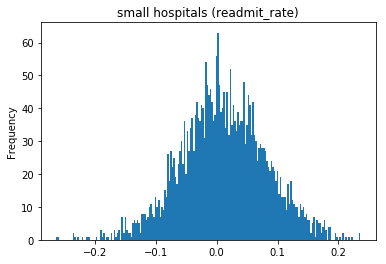

In [9]:
# for a quick estimate of whether these two distributions are the same, we
# can simply subtract one from the other and see if the resulting differences
# are normally distributed around a value of 0 (for readmissinon rate)

# pulling 3000 unique items from small_cohort, then subtracting one from the other
ns = np.random.choice(small_cohort.index, 3000, replace=False)
nl = np.random.choice(sub_large_cohort.index, 3000, replace=False)  
nd = sub_large_cohort.loc[nl].reset_index(drop=True) - small_cohort.loc[ns].reset_index(drop=True)
print nd.mean()
nd[['readmit_rate', 'discharges']].sort_values('discharges').readmit_rate\
        .plot(kind='hist', bins=200, title='small hospitals (readmit_rate)');
    
# That looks great, but the judges like p-values, so let's do that too.  Our goal is to
# compare the two distributions (not the ramdom samples from them but the real ones) and
# get a confidence interval for the assertion that they're the same
# kahn - https://www.youtube.com/watch?v=TcIDXqmt74A
# ....



# the goal of doing this has been to show that most smaller hospitals belong in the same class as the majority
# of larger hospitals, ie - not elite but middle performers.  The reason that matters is that, from a policy
# perspective, it would be best to have a policy that actually leads to the creation of more elite hospitals,
# not one that simply removes a number of average hospitals by selectively punishing the small ones. 

# What we'll
# show is that the overall performance improvement from a consolidation strategy will be small.

# The way we'll show that is by distributing the discharges from the defunct small hospitals 
# evenly among the large ones to see how many new elite hospitals we get vs. how many average (larger)
# ones. Assuming the ratio of elite to average hospitals among large hospitals will remain the same
# (and assuming no more magic thresholds like the one at 10% readmission rates), then we can simply
# count how many new elite hospitals will be created compared to how many currently large hospitals
# just get bigger without getting better. That will give us a good measure of the degree of improvement
# that will come from a consolidation strategy, which will have to be weighed against the harm of removing
# small hospitals from the communities they serve. 

# but have a doubt, shahar.  Bigger really is better and you might be letting your desire to fight
# for the underdog run away with you.

# but the real goal should be to understand precisely what the elite hospitals are doing right.
# some of them actually are fairly small.  This study makes no real attempt to answer that question,
# but is instead a brutal bean counter's approach to quality improvement.  


I wanted to know if the two groups of hospitals appearing in the plots above also break down cleanly by size.  The average number of discharges for hospitals with a readmission rate below .1 is 536 while the average for hospitals with a readmisson rate above .1 is 340.  So the short answer is yes.  Bigger hospitals have lower readmission rates on average.

But the story is not as simple as big=good, small=bad. Even among the better hospitals, the number with fewer than 400 discharges in the period (651) was high compared to the number with more than 400 discharges (730). Among the hospitals with higher readmission rates, there were nearly 2000 hospitals with more than 400 discharges.

The plot below and to the left shows the two groups of hospitals plotted in overlapping histograms by discharge rate (proxy for hospital size).  The ones with readmit_rate < .1 correspond to the hospitals that make up the smaller peak to the left in the histogram above.  The ones with readmit_rate > .1 correspond to the larger peak above. Outliers above 3000 discharges have been removed (there are only 3 of them out of a total 11497 hospitals in the study).

The smallest of the 'better' hospitals has a discharge rate of 111.  While hospitals with fewer than 111 discharges (there were 1522 of these very small hospitals) did fall entirely into the group with the larger readmit_rate rates, their performance within that group was not exceptionally poor.  The readmit_rate distribution for these very small hospitals is plotted on the right below.  As can be seen, the range of readmissions is in line with the range of readmissions of the majority of hospitals and matches the larger peak in the above right plot.

# discharges of hospitals with readmit rate < .1 =  536.11
# discharges of hospitals with readmit rate > .1 =  340.96
low readmit hospitals with < 400 discharges = 651
low readmit hospitals with > 400 discharges = 730
high readmit hospitals with < 400 discharges = 7104
high readmit hospitals with > 400 discharges = 2993


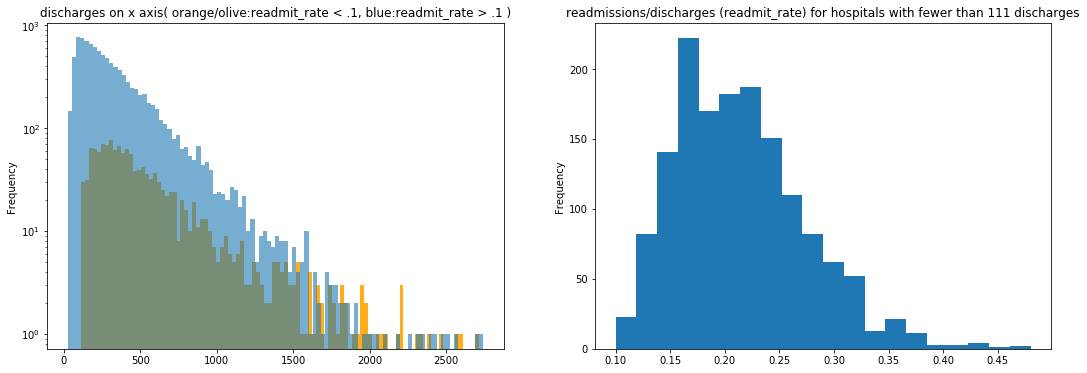

In [10]:
fig2()

Let's evaluate some of the assertions in the study.

* 1) Overall, rate of readmissions is trending down with increasing number of discharges

We saw that smaller hospitals were associated with higher readmission rates, but is it a trend? 

The scatter plot below (left) shows discharges on the x axis and readmit_rate (readmissions per discharge) on the y axis.  This is another view on what we've already seen, that there are two distint groups in terms of readmit_rate but that the correlation with discharges is not general. Instead, the effect is focused on hospitals with fewer than 500 discharges.  Above that level, there appears to be no correlation between size and readmission rates (<b>which will be confirmed later</b>). 

The rounded corner in the lower left seems to show the transition from relatively smaller hospitals to larger ones. That is, as discharges decrease below a critical level (~500), readmission rates begin to rise. Above that critical level, size does not appear to be predictive of readmission rate (<b>again, confirm this</b>).  The plot to the right zooms in on the hospitals with fewer than 500 discharges in the period.  

The real pattern here is that hospitals eventually separate themselves into two groups, high-readmit_rate and low-readmit_rate.  Very small hospitals (below 111 discharges) do, as we've seen, fall exclusively into the high-readmit_rate group.  As hospital size grows, up to about 500 discharges, some are able to transition into the low-readmit_rate group, but most hospitals do not achieve this, regardless of size.

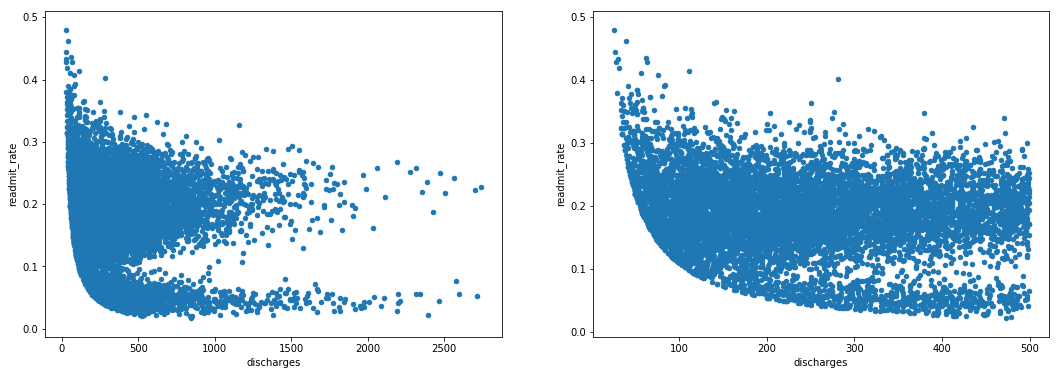

In [11]:
fig3()

* 2) With lower number of discharges, there is a greater incidence of excess rate of readmissions

One problem with <i>excess</i> rate is that it's based one two values, a <i>predicted</i> readmissions rate and an <i>expected</i> readmissions rate, that are not explained.  

<blockquote>Excess readmission ratio = risk-adjusted predicted readmissions/risk-adjusted expected readmissions 
</blockquote>

However, a quick examination (below) shows that the expected rate is approximated by the 200 point moving average of the readmissions rate (readmissions per discharge), while the predicted rate is approximated by the 4 point moving average of that same value.  While these approximations aren't perfect, they're close enough to take some of the mystery out of the meaning of the "excess rate", which is the degree of variance from an ideal, where that ideal is roughly the 200 point moving average of the ratio between readmissions and discharges, once hospitals are sorted correctly.

The sorting is critical. In the background to the report, it says that the expected rate is calculated "based on an average hospital with similar patients", not on size or its proxy, discharges.  In the plots below, I had to sort by the expected rate in order to see the relationship between that and the readmission rates, but I would have prefered to have the data available that shows "an average hospital with similar patients".

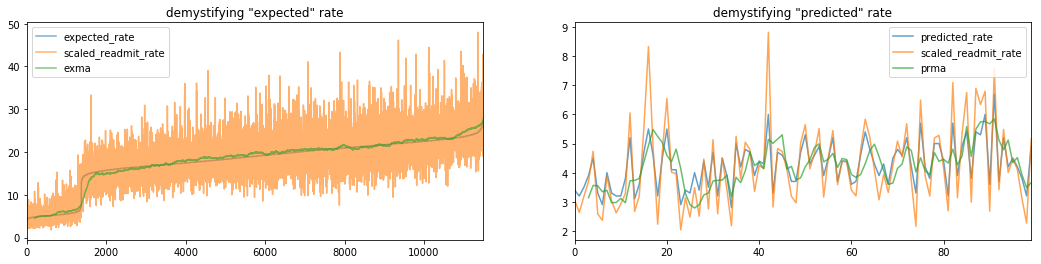

In [12]:
fig4()

So, does the excess rate increase as hospital size falls?  The scatter plot below appears to show that broad tendency, if you squint or if you find pictures of UFOs convincing.  But as we've seen this simplication belies the true structure of the data, which is better seen by looking at readmit_rate rates directly.

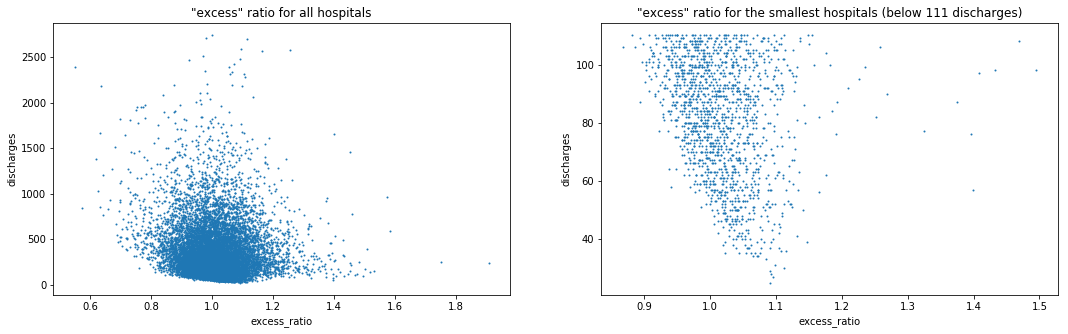

In [13]:
fig5()

######  D. Regulatory policy recommendations
* 1) Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
* 2) Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


What I think the data really shows is that some hospitals, once they grow past a certain size (roughly 500 discharges in this period) are able to distinguish themselves and achieve low readmission rates.  Most hospitals, regardless of size, do not achieve this.  Size is, therefore, a necessary but not sufficient condition for making the leap to lower readmission rates.  

But penalizing small hospitals seems misguided for a couple of reasons.  

First, the study doesn't explain why the majority of hospitals with higher readmission rates, regardless of size, are not better than they are.  Although the calculation of the "expected rate" provides some hint of that analysis, the work itself is not presented or discussed.  I suspect that those facors, whatever they are, are much more important than hospital size.

Second, many small hospitals serve rural communities where there are no large hospitals nearby.  Consolidation doesn't improve care for those people - it makes care inaccessible.
   

In [14]:
#cdf

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [15]:
# Your turn